In [1]:
# Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from scipy.stats import boxcox
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [2]:
# Download the dataset
data_set = pd.read_csv("/home/sscf/wqu_mscfe/Financial Econometrics/M1/fin_data_set.csv")

# Select 8 variables and standardise
pc = data_set[
    [
        "Dow_Q_EX_R",
        "Pepsi_Q_EX_R",
        "REV_Q_R",
        "GOOG_Q_EX_R",
        "BAC_Q_EX_R",
        "WMT_Q_EX_R",
        "GE_Q_EX_R",
        "SBUX_Q_EX_R",
    ]
]
pca_data = preprocessing.scale(pc)  # scale all variables to standard normal N~(0, 1)
pca = PCA(n_components=8)
pca.fit(pca_data)

PCA(n_components=8)

In [3]:
# Get proportions of variance and cumulative proportion of variance
pr_var = pca.explained_variance_ratio_
cum_pr = np.cumsum(pca.explained_variance_ratio_)
ind = ["Proportion of variance", "Cumulative proportion of variance"]
cols = ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8"]
pd.DataFrame(np.vstack((pr_var, cum_pr)), ind, columns=cols)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Proportion of variance,0.417539,0.193287,0.171490,0.108867,0.042000,0.028306,0.026893,0.011619
Cumulative proportion of variance,0.417539,0.610826,0.782316,0.891183,0.933183,0.961489,0.988381,1.000000


Let's look at the proportion of variance and cumulative proportion in the above chart. According to the chart, we can see that the first principal component accounts for 42% of the total variance in the data. The first six principal components explain about 96% of the total variance.

Next, we would like to see how PCA can help us reduce the number of independent variables in the model. We know <u> each principal component is a linear function of eight original independent variables. </u> We can choose the original variable with the highest absolute value of the coefficient in the linear combination as a proxy of that principal component.

In [4]:
# Coefficients (Loadings) of 8 Principal Components
pc_res = pd.DataFrame(pca.components_.T, index=list(pc.columns), columns=cols)
pc_res

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Dow_Q_EX_R,-0.501013,-0.081975,-0.201491,-0.151476,-0.172552,-0.161302,-0.116793,-0.780570
Pepsi_Q_EX_R,-0.370323,-0.416369,0.215351,0.267349,0.486188,-0.340799,-0.423131,0.200210
REV_Q_R,-0.089143,0.205496,0.723855,0.314653,-0.525310,0.024685,-0.213269,-0.069342
GOOG_Q_EX_R,-0.481635,-0.115076,0.033447,0.219037,0.147889,0.789841,0.241923,0.037978
BAC_Q_EX_R,-0.399072,0.169106,-0.470595,-0.014795,-0.462351,-0.034007,-0.323626,0.520391
WMT_Q_EX_R,-0.116011,-0.659655,0.213805,-0.389464,-0.370728,-0.129019,0.392582,0.214001
GE_Q_EX_R,-0.399918,0.444523,0.093024,0.117590,0.150220,-0.440478,0.622124,0.127903
SBUX_Q_EX_R,-0.198186,0.321096,0.334835,-0.769979,0.249503,0.146820,-0.239618,0.106832


This shows the coefficients of eight independent variables for each principal component. The coefficients here can also be called **loadings**. For $PC_1$, the Dow 30 Index excess return has the highest absolute value of the coefficient. This means that the Dow 30 Index excess return has the largest impact on $PC_1$. Therefore, we can use the Dow 30 Index excess return as a proxy for $PC_1$. Following the same logic, we can use Walmart's excess return as a proxy for $PC_2$. We also know that the first six principal components cover around 96% of the data variation. In this case, we can just choose *Dow 30* Index excess return, Walmart excess return, *KO*'s revenue growth, Starbucks excess return, and Google excess return to run a regression model.

Let's rerun to our revised regression model with fewer independent variables to see the result.

**Figure 4: KO Excess Return Revised Model Result Applying PCA Information**

In [5]:
# OLS for revised model
model_4 = smf.ols(
    "Coke_Q_EX_R ~ Dow_Q_EX_R + REV_Q_R + GOOG_Q_EX_R + WMT_Q_EX_R + SBUX_Q_EX_R",
    data=data_set,
).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Coke_Q_EX_R   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     4.493
Date:                Mon, 13 Nov 2023   Prob (F-statistic):            0.00950
Time:                        16:40:13   Log-Likelihood:                 38.030
No. Observations:                  22   AIC:                            -64.06
Df Residuals:                      16   BIC:                            -57.51
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.0109      0.014     -0.757      0.460      -0.042       0.020
Dow_Q_EX_R      0.6091      0.286      2.133      0.049       0.004       1.214
REV_Q_R         0.1418      0.103      1.380      0.186      -0.076       0.359
GOOG_Q_EX_R     0.1060      0.177      0.600      0.557      -0.268       0.480
WMT_Q_EX_R     -0.0004      0.144     -0.003      0.998      -0.305       0.304
SBUX_Q_EX_R     0.0551      0.117      0.472      0.644      -0.193       0.303
==============================================================================
Omnibus:                        1.148   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.563   Jarque-Bera (JB):                1.031
Skew:                          -0.466   Prob(JB):                        0.597
Kurtosis:                       2.493   Cond. No.                         30.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the result in Figure 4, we can see that the *Dow 30* Index has become significant, and the adjusted $R^2$ has improved from 0.406 at the beginning of this lesson to 0.454. By using the information provided by PCA, we can reduce the impact of multicollinearity among independent variables.<span style='color: transparent; font-size:1%'>All rights reserved WQU WorldQuant University QQQQ</span>

## Transforming Variables

**Method 1: Independent Variables Only**

When the linear relationship assumption between the dependent variable and independent variable(s) doesn't exist, we need to transform the independent variable(s) so that the linear relationship is present. The methods to try are log transformation, square root transformation, or cube root transformation. These methods have two things in common:

* They preserve the order of the data points
* They "tame" outliers by making them less extreme. Note the change in the scales between the two graphs.

Following up from the example in Figure 5, we can do a log transformation on $X$. In Figure 6, we can see the original scatter plot from Figure 5 on the left and the transformed $X$ in the scatter plot on the right. You can see that there is a linear relationship between $Y$ and $\ln(X)$.

**Method 2: Dependent Variable Only**

When the dependent variable doesn't exhibit normal distribution, we need to transform the dependent variable to normal. We can use log transformation, square root transformation, or cube root transformation. One more thing to consider is the outliers for dependent variables with skewed distribution. If you drop the outliers on the tail, it may bring the dependent variable back to normal distribution.

Another method to consider is the **Box and Cox method**. Box and Cox method is a variable transformation method that can transform a non-normally distributed variable to a normally distributed variable. Assume we have a dependent variable $Y$ and an independent variable $X$. The Box and Cox method will try to find a $\lambda$ satisfying the following rules and converting $Y$ to a normally distributed variable.

$$
\text{new} Y = \begin{cases} 
  \frac{ (Y^{\lambda} - 1)}{\lambda },  & \ \text{ if }  \lambda \neq 0 \\ 
  \log(Y),  &  \ \text{ if } \lambda = 0
\end{cases} $$

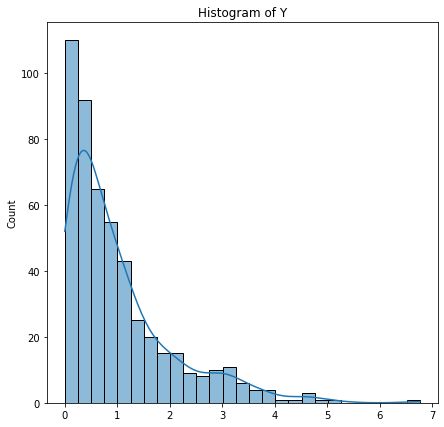

In [6]:
# Generate random dataset
np.random.seed(0)  # to make reproducible example
Y = np.random.exponential(size=500)

# Plot distribution of data
plt.figure(figsize=(7, 7))
plt.title("Histogram of Y")
sns.histplot(Y, kde=True)
plt.show()

Optimal Box-Cox transformation lambda: 0.23254413038935326


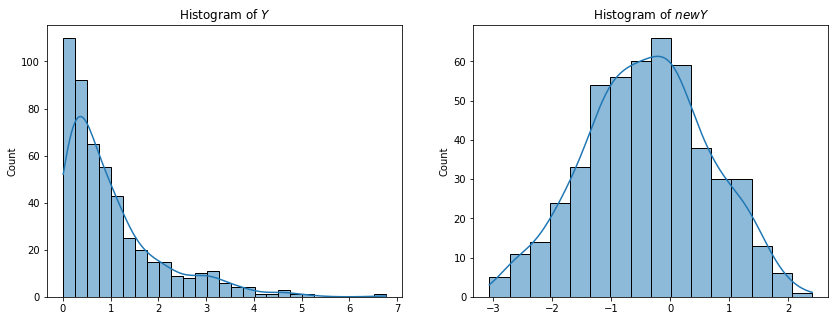

In [7]:
# Apply Box-Cox transformation on original data
new_Y, best_lambda = boxcox(Y)
print("Optimal Box-Cox transformation lambda:", best_lambda)

# Plot distributions of original data
plt.figure(figsize=(14, 5))
ax1 = plt.subplot(121)
sns.histplot(Y, kde=True, ax=ax1)
plt.title("Histogram of $Y$")

# Plot distribution of transformed data
ax2 = plt.subplot(122)
sns.histplot(new_Y, kde=True, ax=ax2)
plt.title("Histogram of $newY$")
plt.show()

**Method 3: Both Dependent Variable and Independent Variables**

When the dependent variable and independent variable(s) don't exhibit a linear relationship and when the dependent variable is not normally distributed, we need to transform both the dependent variable and independent variables. Like last section, we can use log, square root, or cube root transformations on these variables.